In [2]:
!python3 -m pip install opencv-python
!python3 -m pip install imutils
!python3 -m pip install scipy
!python3 -m pip install kivymd

     |████████████████████████████████| 2.3 MB 183 kB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 115 kB/s eta 0:00:01
  Using cached kivy-garden-0.1.4.tar.gz (6.8 kB)
     |████████████████████████████████| 575 kB 130 kB/s eta 0:00:01
  Created wheel for Kivy-Garden: filename=Kivy_Garden-0.1.4-py3-none-any.whl size=4531 sha256=16b6d8bd3c63774dbc6c8a6f4ba33808b1f2aac529659bc284846bc7480bc181
  Stored in directory: /home/pouya/.cache/pip/wheels/d2/72/1a/9ddd17f00755707937caa350616965fb3330a6270425f397e6
Successfully built Kivy-Garden


In [7]:
import cv2
import dlib
from imutils import face_utils
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import time

In [8]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# fa = face_utils.FaceAligner(predictor, desiredFaceWidth=256)

In [245]:
# implementing Realt Time Heart Rate Monitoring From Facial RGB Color Video Using Webcam H.Rahman, M.U Ahmed

def process(data_buffer, times):
    
    
    """
    Detrending
    Remove unwanted trend from series
    the collected RGB signals will be drfting and noising
    
    """
    data_buffer = signal.detrend(data_buffer, axis=0)
    
    
    # Filtering
    filter_ = np.hamming(len(data_buffer)) * 1.4 + 0.6
#     filter_ = filter_.reshape(128, 1)
    x_filtered = filter_ * data_buffer
    
    # Normalization
#     data_buffer_normalized = (x_filtered - x_filtered.mean()) \
#                                     / x_filtered.std()
    
    
    data_buffer_normalized = x_filtered / np.linalg.norm(x_filtered)
    
#     plt.plot(data_buffer_normalized)
    
    fft = np.fft.fft(data_buffer_normalized * 5)
    fft = np.abs(fft) ** 2
    
    times_ = np.array(times)
    
    selected_freq = (times_ > 0) & (times_ < 4)
    times_ = times_[selected_freq]
    
    plt.plot(times_, fft[selected_freq][:])

#     plt.plot(times, fft)
#     print(len(signal.find_peaks(fft[selected_freq][:])[0]))
    
    bpm = len(signal.find_peaks(fft[selected_freq][:])[0]) / (times[-1] - times[0]) * 60
#     bpm = len(signal.find_peaks(fft)[0]) / (times[-1] - times[0]) * 60
    
    print(bpm)

83.36666666666667


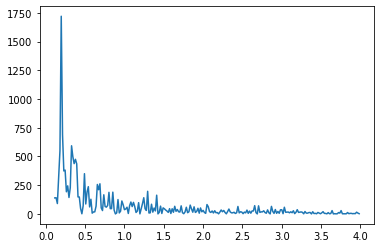

In [246]:
times = np.linspace(0, len(channel_means) / fps, len(channel_means))
process(channel_means[:, 1], times)

In [6]:
# Measuring Heart Rate From Video Isabel Bush Stanford

# def process1(data_buffer):
    
#     length = times[-1] - times[0]

#     fps = len(data_buffer) / length
    
#     detrend = signal.detrend(data_buffer.mean(axis=1))

#     normalized = (detrend - detrend.mean()) / detrend.std() 

#     filtered = (np.hamming(buffer_size) * 1.4 + 0.6) * normalized 

#     fft = np.fft.rfft(filtered)
    
# #     plt.plot(fft)
    
#     peaks_index = signal.find_peaks(fft)[0] 
    
#     peaks_in_range = np.sum((fft[peaks_index] > 0.75) & (fft[peaks_index] < 4)) 
    
#     print((peaks_in_range / length) * 60)

#     times_ = np.array(times)
    
#     times__ = times_[(times_ > 0.75) & (times_ < 4)]

#     fft_red = fft[:, 0][(times_ > 0.75) & (times_ < 4)]
#     fft_green = fft[:, 1][(times_ > 0.75) & (times_ < 4)]
#     fft_blue = fft[:, 2][(times_ > 0.75) & (times_ < 4)]

#     bpms.append(times__[np.argmax(fft_red)] * 60)
#     bpms.append(times__[np.argmax(fft_green)] * 60)
#     print(np.array(bmps[-30:]).mean())
    # print(times[np.argmax(fft_blue)] * 60)

In [86]:
# cv2.namedWindow("preview")
# vc = cv2.VideoCapture("dataset/16/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_16.avi")

# data_buffer = []
# # times = []
# bpms = []
# buffer_size = 128

# t0 = time.time()

# if vc.isOpened():
#     rval, frame = vc.read()
# else:
#     rval = False
    
# while rval:
#     cv2.imshow("preview", frame)
#     rval, frame = vc.read()
#     key = cv2.waitKey(20)
    
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     rects = detector(gray, 0)
    
#     if len(rects) > 0:
        
#         (x, y, w, h) = face_utils.rect_to_bb(rects[0])
        
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
#         face_frame = frame[y: y + h, x: x + w]
        
        
#         grayf = cv2.cvtColor(face_frame, cv2.COLOR_BGR2GRAY)
#         shape = predictor(grayf, rects[0])
#         shape = face_utils.shape_to_np(shape)
        
#         cv2.rectangle(frame,(shape[54][0], shape[29][1]), #draw rectangle on right and left cheeks
#                         (shape[12][0],shape[33][1]), (0,50,50), 0)
        
#         cv2.rectangle(frame, (shape[4][0], shape[29][1]), 
#                         (shape[48][0],shape[33][1]), (0,255,0), 0)
        
        
# #         for (a, b) in shape:
# #             cv2.circle(frame, (a, b), 1, (0, 0, 255), -1) #draw facial landmarks
        
# #         for (a,b) in [(shape[18][0], shape[18][1]), (shape[25][0], shape[25][1] - 10)]:
# #             cv2.circle(frame, (a, b), 1, (0, 0, 255), -1)
        
# #         forehead = {
# #             "upper_x": shape[18][0], 
# #             "upper_y": shape[18][1] - int(0.25 * h),
# #             "lower_x": shape[25][0],
# #             "lower_y": shape[25][1] - 20}
        
# #         cv2.rectangle(frame, (forehead["upper_x"], forehead["upper_y"]), (forehead["lower_x"], forehead["lower_y"]), (0, 50, 50), 0) 
    
    
#         ROI1 = frame[shape[29][1]:shape[33][1], shape[54][0]: shape[12][0]] # right chin
# #         ROI2 = frame[forehead["upper_y"]: forehead["lower_y"], forehead["upper_x"]: forehead["lower_x"]]
        
# #         ROI2 = frame[shape[29][1]: shape[33][1], shape[4][0]:shape[48][0]]
        
# #         print(ROI1 + ROI2 / 2)
        
#         mean = ROI1.mean(axis=(0, 1))
        
#         g = mean[1]
        
#         if (abs(mean[1] - np.mean(data_buffer)) > 10) and (len(data_buffer) > 99):
#            g = data_buffer[-1]
        
#         data_buffer.append(g)
        
# #         times.append(time.time() - t0)
        
        
#         if len(data_buffer) > 128 :
            
#             data_buffer = data_buffer[-buffer_size:]
            
# #             times = times[-buffer_size:]
            
# #             times[1:] = times[1:] - times[0]
            
#             process(np.array(data_buffer), times, bpms)
        
        
#     else:
#         cv2.putText(frame, "No FACE DETECTED", (65, 220), cv2.FONT_HERSHEY_PLAIN, 2, (0, 256, 256))
    
    
#     if key == 27: # Exit on Escape
#         break
# cv2.destroyWindow("preview")
# waitKey(1)

In [204]:
import cv2
import numpy as np

cap = cv2.VideoCapture("./dataset/532/P5-Rec1-2009.07.22.12.05.44_C1 trigger _C_Section_12.avi")
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1


fps = cap.get(cv2.CAP_PROP_FPS)
    
cap.release()

# cv2.waitKey(0)

61.0


In [162]:
def get_ROI(video_buffer):
    
    ROI = np.zeros((video_buffer.shape[0], 10, 10, 3))
    
    data_buffer = []
#     times = []
    bpms = []
#     buffer_size = 128
    
    for frame_number, frame in enumerate(video_buffer):
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        rects = detector(gray, 0)
        
        if len(rects) > 0:
            
            # converting opencv Rectangle object to tuple
            (x, y, w, h) = face_utils.rect_to_bb(rects[0])
            
            # drawing face bounding box on screen
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
             
            face_frame = frame[y: y + h, x: x + w]
            

            grayf = cv2.cvtColor(face_frame, cv2.COLOR_BGR2GRAY)
            shape = predictor(grayf, rects[0])
            shape = face_utils.shape_to_np(shape)
            
            ROI1_detected = frame[shape[29][1]:shape[33][1], shape[54][0]: shape[12][0]]
            
            
            y_start, y_end = ROI1_detected.shape[0] // 2 - 5, ROI1_detected.shape[0] // 2 + 5
            x_start, x_end = ROI1_detected.shape[1] // 2 - 5, ROI1_detected.shape[1] // 2 + 5
            

            ROI1_selected = ROI1_detected[y_start: y_end, x_start: x_end]
            
            ROI[frame_number] = ROI1_selected
            
    return ROI.mean(axis=(1, 2))

In [233]:
channel_means = get_ROI(buf[0:60 * 60])

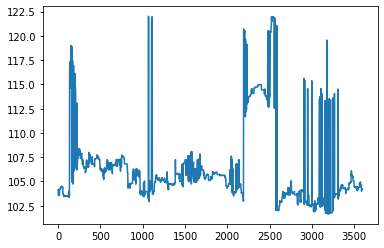

In [234]:
plt.plot(channel_means[:, 2])